In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
import string
import spacy
%matplotlib inline 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from textblob import TextBlob

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords 

In [2]:
stopwords 

<WordListCorpusReader in '/Users/divyauppal/nltk_data/corpora/stopwords'>

In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install VaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [5]:
conda install -c conda-forge vadersentiment

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_csv("/Users/divyauppal/Desktop/NLP_Project/Amazon_Review/train.txt",sep=":\s",header = None,error_bad_lines=False)

/opt/anaconda3/envs/metis/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
/opt/anaconda3/envs/metis/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 4: Expected 2 fields in line 4, saw 4. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 5: Expected 2 fields in line 5, saw 5. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 21: Expected 2 fields in line 21, saw 3. Error could possibly be due to quotes being ignored w

Skipping line 97228: Expected 2 fields in line 97228, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 97229: Expected 2 fields in line 97229, saw 15. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 97260: Expected 2 fields in line 97260, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 97288: Expected 2 fields in line 97288, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 97305: Expected 2 fields in line 97305, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 97322: Expected 2 fields in line 97322, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 97323: Expected 2 fields in line 97323, saw 3. Error could possibly be due to quotes 

Skipping line 182908: Expected 2 fields in line 182908, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 182910: Expected 2 fields in line 182910, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 182932: Expected 2 fields in line 182932, saw 4. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 182934: Expected 2 fields in line 182934, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 182947: Expected 2 fields in line 182947, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 182971: Expected 2 fields in line 182971, saw 6. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 182985: Expected 2 fields in line 182985, saw 3. Error could possibly be d

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Skipping line 796715: Expected 2 fields in line 796715, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 796721: Expected 2 fields in line 796721, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 796722: Expected 2 fields in line 796722, saw 4. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 796737: Expected 2 fields in line 796737, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 796833: Expected 2 fields in line 796833, saw 3. E

Skipping line 885928: Expected 2 fields in line 885928, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 885941: Expected 2 fields in line 885941, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 885953: Expected 2 fields in line 885953, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 885965: Expected 2 fields in line 885965, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 885979: Expected 2 fields in line 885979, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 885985: Expected 2 fields in line 885985, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 886003: Expected 2 fields in line 886003, saw 3. Error could possibly be d

Skipping line 972120: Expected 2 fields in line 972120, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 972128: Expected 2 fields in line 972128, saw 4. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 972214: Expected 2 fields in line 972214, saw 4. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 972305: Expected 2 fields in line 972305, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 972319: Expected 2 fields in line 972319, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 972336: Expected 2 fields in line 972336, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 972354: Expected 2 fields in line 972354, saw 3. Error could possibly be d

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Skipping line 2363674: Expected 2 fields in line 2363674, saw 4. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 2363691: Expected 2 fields in line 2363691, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 2363744: Expected 2 fields in line 2363744, saw 4. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 2363754: Expected 2 fields in line 2363754, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 2363755: Expected 2 fields in line 2363755

Skipping line 2473415: Expected 2 fields in line 2473415, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 2473430: Expected 2 fields in line 2473430, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 2473439: Expected 2 fields in line 2473439, saw 4. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 2473452: Expected 2 fields in line 2473452, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 2473490: Expected 2 fields in line 2473490, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 2473516: Expected 2 fields in line 2473516, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 2473519: Expected 2 fields in line 2473519, saw 3. Error could

Skipping line 2583598: Expected 2 fields in line 2583598, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 2583608: Expected 2 fields in line 2583608, saw 4. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 2583852: Expected 2 fields in line 2583852, saw 4. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 2583914: Expected 2 fields in line 2583914, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 2583937: Expected 2 fields in line 2583937, saw 4. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 2583940: Expected 2 fields in line 2583940, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 2583968: Expected 2 fields in line 2583968, saw 3. Error could

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Skipping line 3568015: Expected 2 fields in line 3568015, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 3568020: Expected 2 fields in line 3568020, saw 4. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 3568028: Expected 2 fields in line 3568028, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 3568038: Expected 2 fields in line 3568038, saw 3. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 3568148: Expected 2 fields in line 3568148

In [44]:
df.info()
results = []

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3399509 entries, 0 to 3399508
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   rating          object
 1   review          object
 2   review_heading  object
dtypes: object(3)
memory usage: 77.8+ MB


In [6]:
df[2] = df[0].apply(lambda x: x.split('__label__'))
df[0] = df[2].apply(lambda x: x[1][0])
df[3] = df[2].apply(lambda x: x[1][2:])
df.drop(columns = 2,inplace = True )

In [7]:
df.rename(columns = {0: "rating", 1: "review", 3: "review_heading"}, inplace = True)
df1 = df.copy(deep = True)


In [9]:
df1.head()

rating                                             review  \
0      2  This sound track was beautiful! It paints the ...   
1      2  I'm reading a lot of reviews saying that this ...   
2      2  This soundtrack is my favorite music of all ti...   
3      2  I am quite sure any of you actually taking the...   
4      1  This is a self-published book, and if you want...   

                          review_heading  
0         Stuning even for the non-gamer  
1  The best soundtrack ever to anything.  
2                               Amazing!  
3                an absolute masterpiece  
4                           Buyer beware

In [8]:
X = df1.drop(columns = ["rating","review_heading"]) 
y = df1["rating"]





In [9]:
X_work, X_ignore, y_work, y_ignore = train_test_split(X, y, test_size=0.997,random_state=42,stratify = y)
X_test, X_ignore, y_test, y_ignore = train_test_split(X_ignore, y_ignore, test_size=0.997, random_state=42,stratify = y_ignore)

In [10]:
y_work.value_counts(normalize = True)

2    0.501569
1    0.498431
Name: rating, dtype: float64

In [11]:
X_work_spacy = X_work.copy(deep = True).reset_index(drop = True)
y_work_spacy = y_work.copy(deep = True).reset_index(drop = True)

In [12]:
y_work = y_work.astype("int32", copy = True)

y_test = y_test.astype("int32", copy = True)

In [13]:
max_length = max(X_work["review"].map(len))
min_length = min(X_work["review"].map(len))
print(f"Max length of Review:", max_length)
print(f"Min length of Review:", min_length)

Max length of Review: 1007
Min length of Review: 56


In [14]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

X_work_review = X_work.review.map(alphanumeric).map(punc_lower)
X_test_review = X_test.review.map(alphanumeric).map(punc_lower)

In [20]:
X_work_review.describe

<bound method NDFrame.describe of 1417849    i ve always stuck up for the vengaboys when pe...
524658     the premise of vacancy is intriguing  people w...
600694     i have been using this for about a week now  i...
1056035    i purchased this product with big expectations...
2898997    not worth the money  there are much better die...
                                 ...                        
1368131    i m very disappointed with these pillow cases ...
1100338    my first book that i read by carla kelly was t...
905648     absolutely love this product  not oily not dry...
1683051    this is a must have cd for any fan of sf bay a...
1177126    having recently learned that my uncle was a me...
Name: review, Length: 10198, dtype: object>

In [15]:
nltk.download('stopwords')
words_to_cut=['book', 'product','music','album','work','song','cd','dvd','film','amazon','friend','video',"could","doe",\
             'ha','might','must','need','sha','wa','would','ha','le','wa','movie','read']
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(words_to_cut)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/divyauppal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(-0.5, 399.5, 199.5, -0.5)

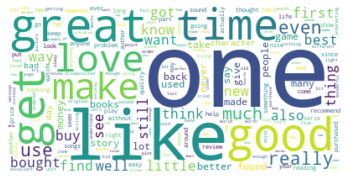

In [16]:
words = ''
for review in X_work_review.head(30000):
    words= words + review
word_cloud_review = WordCloud(background_color="white",stopwords = stopwords).generate(words)
plt.imshow(word_cloud_review, interpolation='bilinear') 
plt.axis("off")

In [23]:
print(word_cloud_review.words_.keys())

dict_keys(['one', 'like', 'great', 'get', 'good', 'time', 'love', 'make', 'really', 'use', 'even', 'much', 'bought', 'buy', 'well', 'also', 'think', 'first', 'way', 'know', 'see', 'best', 'little', 'thing', 'want', 'find', 'still', 'new', 'got', 'story', 'people', 'game', 'say', 'books', 'back', 'better', 'money', 'many', 'found', 'give', 'made', 'never', 'take', 'used', 'lot', 'character', 'day', 'bad', 'problem', 'put', 'go', 'author', 'two', 'thought', 'easy', 'songs', 'year', 'fan', 'reading', 'come', 'show', 'however', 'seem', 'recommend', 'set', 'look', 'keep', 'sound', 'review', 'ever', 'part', 'right', 'life', 'since', 'end', 'going', 'something', 'looking', 'play', 'without', 'u', 'purchased', 'nice', 'price', 'anyone', 'around', 'another', 'watch', 'hard', 'long', 'actually', 'help', 'may', 'quality', 'serie', 'nothing', 'live', 'enough', 'disappointed', 'using', 'version', 'alway', 'last', 'real', 'item', 'came', 'piece', 'every', 'feel', 'tried', 'different', 'waste', 'exce

In [51]:
del results


In [52]:
analyzer = SentimentIntensityAnalyzer()
score = (X_test_review.map(analyzer.polarity_scores).map(lambda x: x.get('compound')))
score.loc[score >=0 ] = 1
score.loc[score < 0 ] = 0
score = score.astype('int')


In [53]:
# Create a function to calculate the error metrics, since we'll be doing this several times

%matplotlib inline
def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

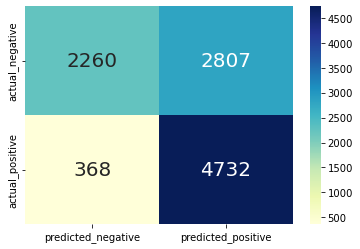

In [54]:
y_work_bin = y_work.map(lambda x: x-1)
y_test_bin = y_test.map(lambda x: x-1)
cm1 = conf_matrix(y_test_bin, score)

In [55]:
results = pd.DataFrame(list(zip(cm1)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['vader']
results

vader
Accuracy   0.688
Precision  0.628
Recall     0.928
F1 Score   0.749

           vader  Text Blobs
Accuracy   0.688       0.662
Precision  0.628       0.604
Recall     0.928       0.945
F1 Score   0.749       0.737


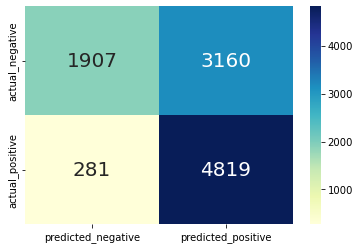

In [56]:
#Create a function to get the polarity


score_bin = (X_test_review.map(lambda x : TextBlob(x).sentiment.polarity).map(lambda x: int(x>=0)))
cm_bin = conf_matrix(y_test_bin, score_bin)

results_blob = pd.DataFrame(cm_bin)

results_blob = results_blob.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_blob.columns = ['Text Blobs']
results = pd.concat([results, results_blob], axis=1)
print(results)

In [57]:
results

vader  Text Blobs
Accuracy   0.688       0.662
Precision  0.628       0.604
Recall     0.928       0.945
F1 Score   0.749       0.737

In [58]:
cv = CountVectorizer(stop_words = stopwords,strip_accents = "unicode",ngram_range =(1,2), min_df =50)
X_transform=cv.fit_transform(X_work_review)
doc_term_df = pd.DataFrame(X_transform.toarray(), columns=cv.get_feature_names())

X_test_transform=cv.transform(X_test_review)
doc_test_df = pd.DataFrame(X_test_transform.toarray(), columns=cv.get_feature_names())

/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
#Loading Data
#Word Tokenizer/TFDID
# wordbubble

#Logistic Regression & Random Forest
#Stop word
#Capital
#Exclamanation
#Rating 3 ignored
#Sentiwordnet: Lexicon
#MPAQA:
#LIWC
#General Inquirer: Sentiment Lexicon
#VADER
#SENTIWORDNET
#TEXTBlob
#Naive Bayes
#Lemmatization
#Stemming
#NGRAM

In [59]:
lr = LogisticRegression(max_iter = 100000)
lr.fit(doc_term_df, y_work_bin)
y_pred_lr = lr.predict(doc_test_df)

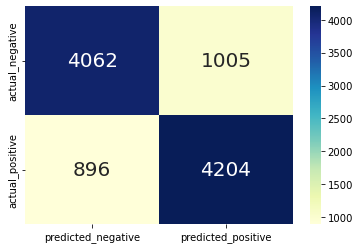

In [60]:
cm2 = conf_matrix(y_test_bin, y_pred_lr)

In [61]:
results_lr = pd.DataFrame(cm2)
results_lr = results_lr.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_lr.columns = ['Logistic Regression Count vectorizer']

results = pd.concat([results, results_lr], axis=1)
results

vader  Text Blobs  Logistic Regression Count vectorizer
Accuracy   0.688       0.662                                 0.813
Precision  0.628       0.604                                 0.807
Recall     0.928       0.945                                 0.824
F1 Score   0.749       0.737                                 0.815

In [62]:
model_coefs = lr.coef_[0,:]
model_keys = np.argsort(model_coefs)
vocab_dict = {v: k for k, v in cv.vocabulary_.items()}
# Print the most informative pos/neg terms
top_n_words = 100

pos_words = model_keys[-top_n_words::][::-1]
neg_words = model_keys[:top_n_words]

string_positive = ''
string_negative = ''
for p, n in zip(pos_words, neg_words):
    print(f"{vocab_dict[p]: <20} \t\t {vocab_dict[n]: <20}")
    

well worth           		 disappointing       
pleased              		 awful               
awesome              		 okay                
long time            		 disappointment      
favorites            		 one worst           
incredible           		 poorly              
helps                		 boring              
brings               		 terrible            
wonderful            		 worst               
excellent            		 useless             
helped               		 ridiculous          
provides             		 waste money         
beautifully          		 sucks               
powerful             		 sadly               
loves                		 avoid               
greatest             		 one star            
highly recommended   		 beware              
amazing              		 poor                
lives                		 disappointed        
easy use             		 fails               
enjoyed              		 junk                
well written         		 shame               
perfect   

In [63]:
# Create TF-IDF versions of the Count Vectorizers created earlier in the exercise

tfidf1 = TfidfVectorizer(stop_words=stopwords)
X_train_tfidf1 = tfidf1.fit_transform(X_work_review)
X_test_tfidf1  = tfidf1.transform(X_test_review)

tfidf2 = TfidfVectorizer(ngram_range=(1,2), stop_words=stopwords)
X_train_tfidf2 = tfidf2.fit_transform(X_work_review)
X_test_tfidf2  = tfidf2.transform(X_test_review)


In [35]:
#doc_tfdif1_train = pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names())
#doc_tfdif1_test = pd.DataFrame(X_test_tfidf1.toarray(), columns=tfidf1.get_feature_names())

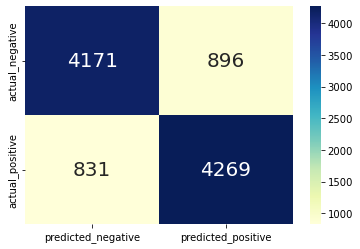

In [64]:
# Fit the first logistic regression on the TF-IDF data
lr.fit(X_train_tfidf1, y_work_bin)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)
cm3 = conf_matrix(y_test_bin, y_pred_tfidf1_lr)



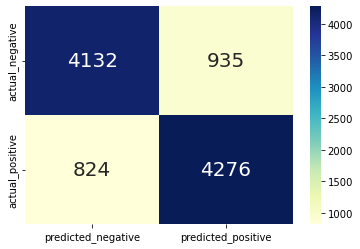

In [65]:
lr.fit(X_train_tfidf2, y_work_bin)
y_pred_tfidf2_lr = lr.predict(X_test_tfidf2)
cm4 = conf_matrix(y_test_bin, y_pred_tfidf2_lr)

In [66]:
results_tfdif = pd.DataFrame(list(zip(cm3,cm4)))
results_tfdif = results_tfdif.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_tfdif.columns = ['Logistic Regression TFIDF', 'Logistic Regression TFIDF ngram (1,2)' ]
results = pd.concat([results, results_tfdif], axis=1)
print(results)

           vader  Text Blobs  Logistic Regression Count vectorizer  \
Accuracy   0.688       0.662                                 0.813   
Precision  0.628       0.604                                 0.807   
Recall     0.928       0.945                                 0.824   
F1 Score   0.749       0.737                                 0.815   

           Logistic Regression TFIDF  Logistic Regression TFIDF ngram (1,2)  
Accuracy                       0.830                                  0.827  
Precision                      0.827                                  0.821  
Recall                         0.837                                  0.838  
F1 Score                       0.832                                  0.829  


In [67]:
#Lemmatization
#code reference
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        regex_little_words = r'(\b\w{1,2}\b)'
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)
                if not re.search(regex_little_words, t)] # keeps words of 3 or more characters


cv1 = CountVectorizer(tokenizer=LemmaTokenizer(),
                       strip_accents = 'unicode',
                       stop_words = stopwords
                       ,min_df=50) 

X_transform1=cv1.fit_transform(X_work_review)
doc_term_df1 = pd.DataFrame(X_transform1.toarray(), columns=cv1.get_feature_names())

X_test_transform1=cv1.transform(X_test_review)
doc_test_df1 = pd.DataFrame(X_test_transform1.toarray(), columns=cv1.get_feature_names())


/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [68]:
doc_term_df1.columns

Index(['ability', 'able', 'absolutely', 'accurate', 'across', 'act', 'acting',
       'action', 'actor', 'actual',
       ...
       'write', 'writer', 'writing', 'written', 'wrong', 'wrote', 'year',
       'yes', 'yet', 'young'],
      dtype='object', length=1079)

In [69]:
lr.fit(doc_term_df1, y_work_bin)
y_pred_lr1 = lr.predict(doc_test_df1)


vader  Text Blobs  Logistic Regression Count vectorizer  \
Accuracy   0.688       0.662                                 0.813   
Precision  0.628       0.604                                 0.807   
Recall     0.928       0.945                                 0.824   
F1 Score   0.749       0.737                                 0.815   

           Logistic Regression TFIDF  Logistic Regression TFIDF ngram (1,2)  \
Accuracy                       0.830                                  0.827   
Precision                      0.827                                  0.821   
Recall                         0.837                                  0.838   
F1 Score                       0.832                                  0.829   

           Logistic Regression Count vectorizer Lemmatizer  
Accuracy                                             0.810  
Precision                                            0.805  
Recall                                               0.820  
F1 Score                                             0.812

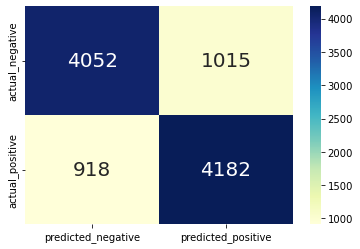

In [70]:
cm5 = conf_matrix(y_test_bin, y_pred_lr1)
results_lr1 = pd.DataFrame(cm5)
results_lr1 = results_lr1.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_lr1.columns = ['Logistic Regression Count vectorizer Lemmatizer']

results = pd.concat([results, results_lr1], axis=1)
results

In [71]:
tfidf3 = TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words = stopwords,strip_accents = 'unicode',min_df = 50)
X_train_tfidf3 = tfidf3.fit_transform(X_work_review)
X_test_tfidf3 = tfidf3.transform(X_test_review)

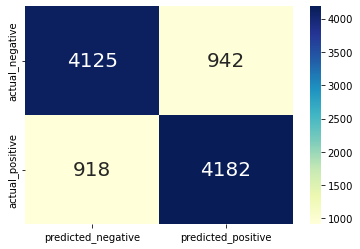

In [72]:
lr.fit(X_train_tfidf3, y_work_bin)
y_pred_tfidf3 = lr.predict(X_test_tfidf3)
cm6 = conf_matrix(y_test_bin, y_pred_tfidf3)


In [73]:
results_tfdif3 = pd.DataFrame(cm6)
results_tfdif3 = results_tfdif3.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_tfdif3.columns = ['Logistic Regression TFIDF and Lemmatizer' ]
results = pd.concat([results, results_tfdif3], axis=1)
print(results)

           vader  Text Blobs  Logistic Regression Count vectorizer  \
Accuracy   0.688       0.662                                 0.813   
Precision  0.628       0.604                                 0.807   
Recall     0.928       0.945                                 0.824   
F1 Score   0.749       0.737                                 0.815   

           Logistic Regression TFIDF  Logistic Regression TFIDF ngram (1,2)  \
Accuracy                       0.830                                  0.827   
Precision                      0.827                                  0.821   
Recall                         0.837                                  0.838   
F1 Score                       0.832                                  0.829   

           Logistic Regression Count vectorizer Lemmatizer  \
Accuracy                                             0.810   
Precision                                            0.805   
Recall                                               0.820   
F1 Sc

In [75]:
pipe = Pipeline([('rfc', RandomForestClassifier())])
# create the search grid.
# Pipeline hyper-parameters are specified as <step name>__<hyper-parameter name>
forest_params = [{'rfc__max_depth': list(range(10, 20))},{'rfc__n_estimators': [100,300,500,700,900]}]
# Instantiate grid-search
grid = GridSearchCV(pipe, forest_params, cv=10, scoring = 'accuracy', n_jobs = -1, verbose = 1)
# run the grid-search and report results
grid.fit(X_train_tfidf1, y_work_bin)
print(grid.best_params_)
y_pred_tfidf_rf = grid.predict(X_test_tfidf1)
print(grid.score(X_test_tfidf1, y_test_bin))

Fitting 10 folds for each of 15 candidates, totalling 150 fits


/opt/anaconda3/envs/metis/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'rfc__n_estimators': 900}
0.821284548047605


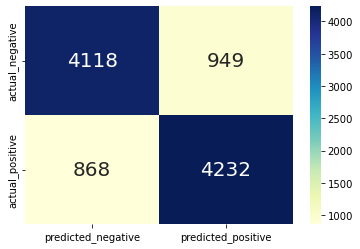

In [76]:
cm7 = conf_matrix(y_test_bin, y_pred_tfidf_rf)

In [77]:
results_tfdif_rf = pd.DataFrame(cm7)
results_tfdif_rf = results_tfdif_rf.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_tfdif_rf.columns = ['Random Forest TFDIF' ]
results = pd.concat([results, results_tfdif_rf], axis=1)
print(results)

           vader  Text Blobs  Logistic Regression Count vectorizer  \
Accuracy   0.688       0.662                                 0.813   
Precision  0.628       0.604                                 0.807   
Recall     0.928       0.945                                 0.824   
F1 Score   0.749       0.737                                 0.815   

           Logistic Regression TFIDF  Logistic Regression TFIDF ngram (1,2)  \
Accuracy                       0.830                                  0.827   
Precision                      0.827                                  0.821   
Recall                         0.837                                  0.838   
F1 Score                       0.832                                  0.829   

           Logistic Regression Count vectorizer Lemmatizer  \
Accuracy                                             0.810   
Precision                                            0.805   
Recall                                               0.820   
F1 Sc

In [78]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf1, y_work_bin)
y_pred_tfidf_mnb = mnb.predict(X_test_tfidf1)


           vader  Text Blobs  Logistic Regression Count vectorizer  \
Accuracy   0.688       0.662                                 0.813   
Precision  0.628       0.604                                 0.807   
Recall     0.928       0.945                                 0.824   
F1 Score   0.749       0.737                                 0.815   

           Logistic Regression TFIDF  Logistic Regression TFIDF ngram (1,2)  \
Accuracy                       0.830                                  0.827   
Precision                      0.827                                  0.821   
Recall                         0.837                                  0.838   
F1 Score                       0.832                                  0.829   

           Logistic Regression Count vectorizer Lemmatizer  \
Accuracy                                             0.810   
Precision                                            0.805   
Recall                                               0.820   
F1 Sc

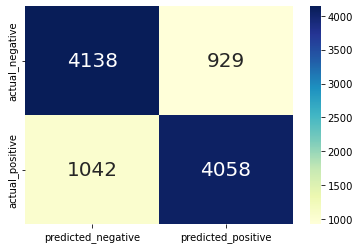

In [79]:
cm8 = conf_matrix(y_test_bin, y_pred_tfidf_mnb)
results_tfdif_mnb = pd.DataFrame(cm8)
results_tfdif_mnb = results_tfdif_mnb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_tfdif_mnb.columns = ['Naive Bayes TFDIF' ]
results = pd.concat([results, results_tfdif_mnb], axis=1)
print(results)

In [80]:
X_work_spacy.head()
nlp = spacy.load('en_core_web_sm')



In [116]:
y_work_spacy = y_work_spacy.astype(int)

In [117]:
X_work_spacy_positive = X_work_spacy.iloc[((y_work_spacy[y_work_spacy ==2]).index)]
X_work_spacy_negative = X_work_spacy.iloc[((y_work_spacy[y_work_spacy ==1]).index)]

In [118]:
X_work_spacy

review
0      I've always stuck up for the Vengaboys when pe...
1      The premise of Vacancy is intriguing. People w...
2      I have been using this for about a week now. I...
3      I purchased this product with big expectations...
4      Not worth the money. There are much better die...
...                                                  ...
10193  I'm very disappointed with these pillow cases ...
10194  My first book that I read by Carla Kelly was T...
10195  Absolutely love this product! Not oily not dry...
10196  This is a must have CD for any fan of SF Bay a...
10197  Having recently learned that my uncle was a me...

[10198 rows x 1 columns]

In [119]:
X_work_spacy_positive


review
6      There isn't really much more to add to what th...
7      I am not even remotely a history buff, but I s...
10     Nice product. Quick and easy transaction. Deli...
11     This DVD made me excited about the acoustic gu...
12     Wow, this is a great item. It holds my cd's (i...
...                                                  ...
10192  This item was exactly what I ordered.It works ...
10194  My first book that I read by Carla Kelly was T...
10195  Absolutely love this product! Not oily not dry...
10196  This is a must have CD for any fan of SF Bay a...
10197  Having recently learned that my uncle was a me...

[5115 rows x 1 columns]

In [124]:
X_work_spacy_negative

review
0      I've always stuck up for the Vengaboys when pe...
1      The premise of Vacancy is intriguing. People w...
2      I have been using this for about a week now. I...
3      I purchased this product with big expectations...
4      Not worth the money. There are much better die...
...                                                  ...
10174  I have a VW Beetle convertible. The black dash...
10178  These guys are music wimps. It's hard to imagi...
10188  After reading the negative reviews on here I s...
10191  If you are looking for an album of Bon Jovi co...
10193  I'm very disappointed with these pillow cases ...

[5083 rows x 1 columns]

In [129]:
X_work_spacy_negative['spacy_doc'] = list(nlp.pipe(X_work_spacy_negative.review))

/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_965/139765367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_work_spacy_negative['spacy_doc'] = list(nlp.pipe(X_work_spacy_negative.review))


In [141]:
X_work_spacy_positive['spacy_doc'] = list(nlp.pipe(X_work_spacy_positive.review))

noun_list = []
for doc in X_work_spacy_positive.spacy_doc:
    for token in doc:
        if token.pos_ == 'NOUN':
            noun_list.append(token.text.lower())

top_noun = Counter(noun_list).most_common(40)
### END SOLUTION

print(top_noun)


[('book', 2494), ('time', 759), ('movie', 630), ('album', 561), ('music', 519), ('story', 501), ('one', 499), ('cd', 444), ('years', 421), ('way', 419), ('product', 378), ('books', 373), ('life', 372), ('people', 353), ('songs', 312), ('price', 299), ('lot', 285), ('game', 272), ('fan', 269), ('year', 259), ('song', 252), ('quality', 251), ('series', 246), ('thing', 243), ('bit', 236), ('dvd', 233), ('day', 231), ('times', 227), ('characters', 214), ('work', 213), ('film', 213), ('things', 203), ('love', 197), ('author', 196), ('job', 176), ('world', 167), ('sound', 163), ('fun', 161), ('part', 161), ('end', 161)]


/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_965/1744119666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_work_spacy_positive['spacy_doc'] = list(nlp.pipe(X_work_spacy_positive.review))


In [142]:
top_noun

[('book', 2494),
 ('time', 759),
 ('movie', 630),
 ('album', 561),
 ('music', 519),
 ('story', 501),
 ('one', 499),
 ('cd', 444),
 ('years', 421),
 ('way', 419),
 ('product', 378),
 ('books', 373),
 ('life', 372),
 ('people', 353),
 ('songs', 312),
 ('price', 299),
 ('lot', 285),
 ('game', 272),
 ('fan', 269),
 ('year', 259),
 ('song', 252),
 ('quality', 251),
 ('series', 246),
 ('thing', 243),
 ('bit', 236),
 ('dvd', 233),
 ('day', 231),
 ('times', 227),
 ('characters', 214),
 ('work', 213),
 ('film', 213),
 ('things', 203),
 ('love', 197),
 ('author', 196),
 ('job', 176),
 ('world', 167),
 ('sound', 163),
 ('fun', 161),
 ('part', 161),
 ('end', 161)]

In [ ]:
topic = ''
for noun in noun_list:
    topic= topic + noun
word_cloud_review = WordCloud(background_color="white",stopwords = stopwords).generate(words)
plt.imshow(word_cloud_review, interpolation='bilinear') 
plt.axis("off")

In [126]:

amod_list = []
for doc in X_work_spacy_positive.spacy_doc:
    for token in doc:
        if token.text == 'book':
            for child in token.children:
                if child.dep_ == 'amod':
                    amod_list.append(child.text.lower())
            
top_adj_book = Counter(amod_list).most_common(20)
print(top_adj_book)

[('great', 65), ('good', 58), ('first', 31), ('best', 24), ('excellent', 23), ('wonderful', 16), ('next', 13), ('other', 12), ('little', 10), ('written', 10), ('informative', 9), ('amazing', 9), ('favorite', 9), ('whole', 8), ('only', 7), ('second', 7), ('new', 7), ('small', 5), ('terrific', 5), ('nice', 5)]


In [133]:

amod_list = []
for doc in X_work_spacy_negative.spacy_doc:
    for token in doc:
        if token.text == 'book':
            for child in token.children:
                if child.dep_ == 'amod':
                    if child.text == 'good':
                        print(doc)
                    amod_list.append(child.text.lower())
            
top_adj_book = Counter(amod_list).most_common(20)
print(top_adj_book)

the only good book bruce and stan wrote was their, 'guide to bible prophecy' these 2 just keep writting stale/boring outlines.
This is the worst Algebra book that I have ever come across. I love Algebra and I bought this book just for brushing up and enjoyment purposes. There does not seem to be any rhyme or reason as to the order of the book and the instructions are very confusing.Don't waste your money on this book a much better book is Maran's Illustrated Effortless Algebra. It is a basic Algebra book that is excellent. Its directions are easy to follow and the illustrations are excellent. College Algebra Demystified is also a good book with lots of practice problems, but the explanations are best in Maran's.
Only young readers who have no idea of what a good book is would give Perry's novels a good rating.I laughed more than anything at Perry's poor attemtps to interest me with her weak characters.
Well, I would argue that this is not a very good book that James Patterson has writt

In [ ]:
X_work_spacy_negative

In [127]:

amod_list = []
for doc in X_work_spacy_positive.spacy_doc:
    for token in doc:
        if token.text == 'movie':
            for child in token.children:
                if child.dep_ == 'amod':
                    amod_list.append(child.text.lower())
            
top_adj_book = Counter(amod_list).most_common(20)
print(top_adj_book)

[('great', 27), ('good', 18), ('favorite', 6), ('wonderful', 6), ('entire', 4), ('fun', 4), ('first', 4), ('best', 3), ('classic', 3), ('excellent', 3), ('amazing', 3), ('second', 3), ('greatest', 2), ('interesting', 2), ('long', 2), ('sad', 2), ('bad', 2), ('enjoyable', 2), ('fantastic', 2), ('geat', 1)]


In [134]:

amod_list = []
for doc in X_work_spacy_negative.spacy_doc:
    for token in doc:
        if token.text == 'movie':
            for child in token.children:
                if child.dep_ == 'amod':
                    if child.text == 'good':
                        print(doc)
                    amod_list.append(child.text.lower())
            
top_adj_book = Counter(amod_list).most_common(20)
print(top_adj_book)

Slow moving. Unnecessary use of foul language. Weak plot. Only a good movie if you are a Jeff Daniels fan.
this movie I would have to say was pretty bad. There's a lot of action scenes, and blood scenes, but overall this movies sucked ass. To tell you straight out why it sucked was because it's a predictable story and leatherface looks like he got f$%#@@ in the face. You would of thought that maybe because Tobe hooper made the first one this would be good,(also he directed this one too). So rent if you want but don't waste your time hoping for a good movie to come out of this.
I know I am in the minority here, but I loved the first one and was very excited to see this one. I don't know if my expectations were too high after the first one, but I found this to be really bad. My wife wife actually liked the first one and fell asleep during this one. I just found it really disjointed and felt they substituted special effects for story. Its a good movie for little kids I guess, but I don't 

In [139]:
text = "I know I am in the minority here, but I loved the first one and was very excited to see this one. I don't know if my expectations were too high after the first one, but I found this to be really bad. My wife wife actually liked the first one and fell asleep during this one. I just found it really disjointed and felt they substituted special effects for story. Its a good movie for little kids I guess, but I don't see this to be anywhere near as good as the Spider man movies, The Incredibles or even the Mummy Returns for that matter. If you haven't seen it already, I would recommend watching it first or waiting for the price to drop before shelling out $20. It's worth watching but I didn't need/want to own this."
text1 = "Although this movie is based loosely on the book, the hour and a half it runs for gives no time to explore all of the nuances of the book's extraordinary adventure. I loved the book, which was well written and thought out, but the movie has basically butchered Christopher Paolini's great fantasy novel.To do a movie like this, the time frame needs to be similar to Lord of the Rings. Another hour or so, and this could have been a good movie. The only reason I gave this two stars is for the dragon and Jeremy Irons.Rent if you still want to see it, don't buy!"
analyzer = SentimentIntensityAnalyzer()
score = analyzer.polarity_scores(text)
score

{'neg': 0.067, 'neu': 0.752, 'pos': 0.181, 'compound': 0.9605}

In [140]:
score = analyzer.polarity_scores(text1)
score

{'neg': 0.013, 'neu': 0.818, 'pos': 0.168, 'compound': 0.9555}